In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv("/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv")
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [4]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [5]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


We can see some informantions only use describe, the mean about customers that bought some item in shopping are 43, the most young was 18, and de oldest was 69. The max quantity that a customer has boutgh was 5 items at once. and has a average of 3 items. And about the price? The maximun that someone has spend was 5225.00 and minimun was 5.23.

In [6]:
df['customer_id'].duplicated().sum()

0


We can see that there'isnt any duplicated customer

We can see that there'isnt any duplicated customer

In [7]:
genero = df.gender.value_counts(normalize=True) * 100
genero = genero.to_frame(name='value').reset_index()
genero

,index,value
0,Female,59.806751
1,Male,40.193249


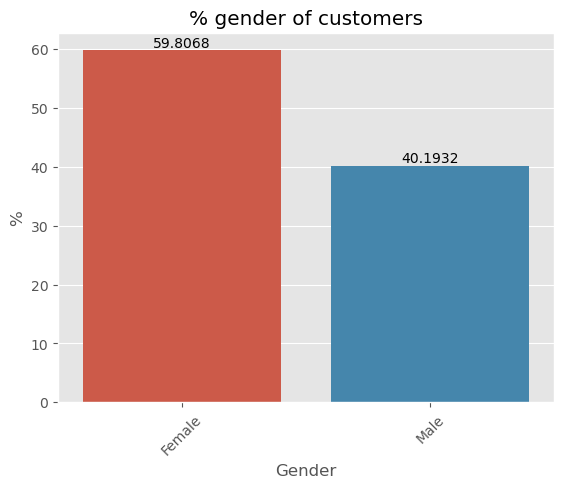

In [8]:
plt.style.use('ggplot')
ax = sns.barplot(data=genero, x='index', y='value')
plt.title("% gender of customers")
plt.ylabel("%")
plt.xlabel("Gender")
plt.xticks(rotation=45)
ax.bar_label(ax.containers[0])
plt.show()

Almost 60% of our customers are woman

In [9]:
df.category.value_counts()

Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: category, dtype: int64

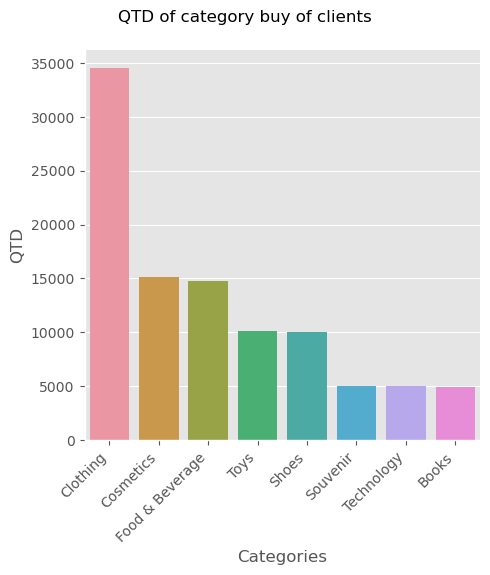

In [10]:
g = sns.catplot(data=df, x='category', kind='count', order=df.category.value_counts().index)
plt.xticks(rotation=45, ha="right")
g.fig.suptitle("QTD of category buy of clients")
g.set_xlabels("Categories")
g.set_ylabels("QTD")
plt.subplots_adjust(top=0.9)

In [11]:
#NOW IN %
categorias = df.category.value_counts().reset_index()
categorias.columns = ['unique_values', 'counts']
categorias['%'] = (categorias.counts / categorias.counts.sum()) * 100
categorias

,unique_values,counts,%
0,Clothing,34487,34.675287
1,Cosmetics,15097,15.179424
2,Food & Beverage,14776,14.856672
3,Toys,10087,10.142071
4,Shoes,10034,10.088782
5,Souvenir,4999,5.026293
6,Technology,4996,5.023276
7,Books,4981,5.008194


In [12]:
fig = px.bar(data_frame=categorias, x='unique_values', y='%', text_auto=True)
fig.layout.template = 'ggplot2'
fig.show()

But this informantion is not good enough, because we have a collum of quantity of itemns tha a customer have bought, so lets see more correct this informantion about the most sell categories

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Clothing'),
  Text(1, 0, 'Cosmetics'),
  Text(2, 0, 'Food & Beverage'),
  Text(3, 0, 'Toys'),
  Text(4, 0, 'Shoes'),
  Text(5, 0, 'Technology'),
  Text(6, 0, 'Books'),
  Text(7, 0, 'Souvenir')])

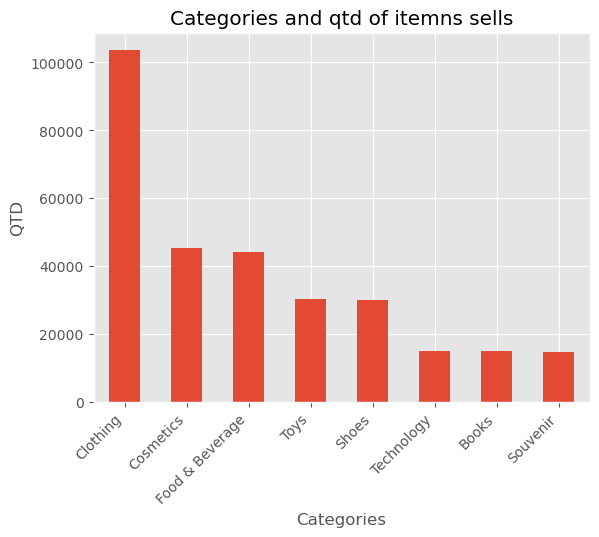

In [13]:
df.groupby('category')['quantity'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title("Categories and qtd of itemns sells")
plt.xlabel("Categories")
plt.ylabel('QTD')
plt.xticks(rotation=45,ha="right")

Now we able to visualize that most of itemn that have more salles are the same, but whe we see the itemns with less sales we notice a diference when souvenir and tecnology, perpaps books be the item tha a client less boutgh, they was buy in a greater quantiry than souvenirs

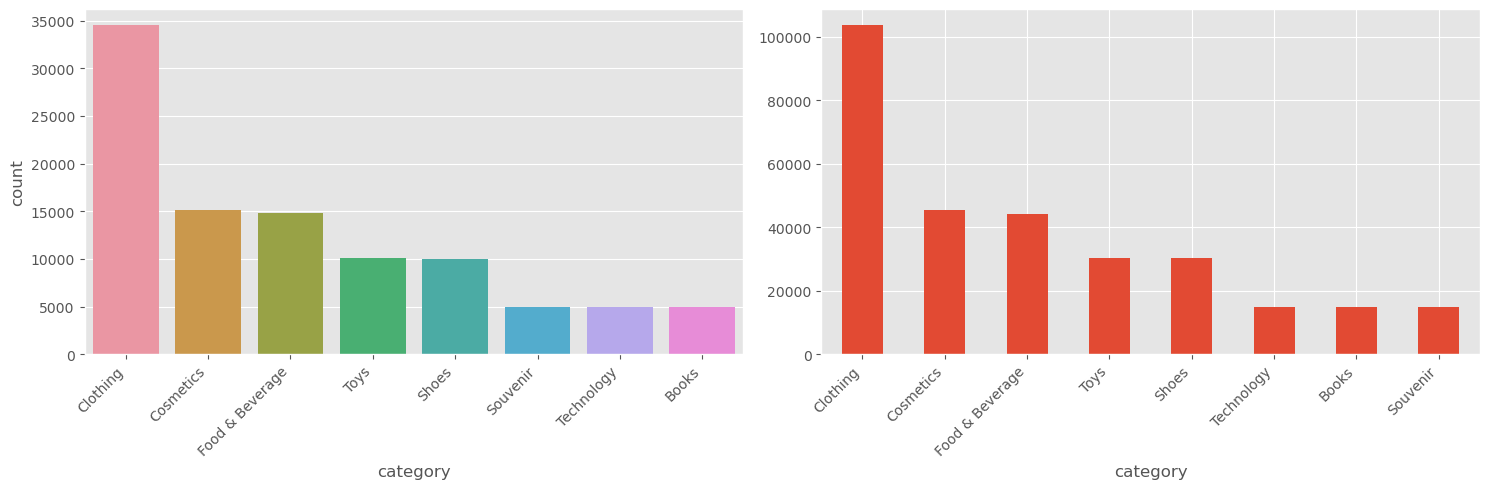

In [14]:
fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(121)
g = sns.countplot(data=df, x='category', order=df.category.value_counts().index)
plt.xticks(rotation=45,ha="right")

ax2 = fig.add_subplot(122)
g = df.groupby('category')['quantity'].sum().sort_values(ascending=False).plot(kind='bar')
plt.xticks(rotation=45,ha="right")

plt.close(2)
plt.close(3)
plt.tight_layout()

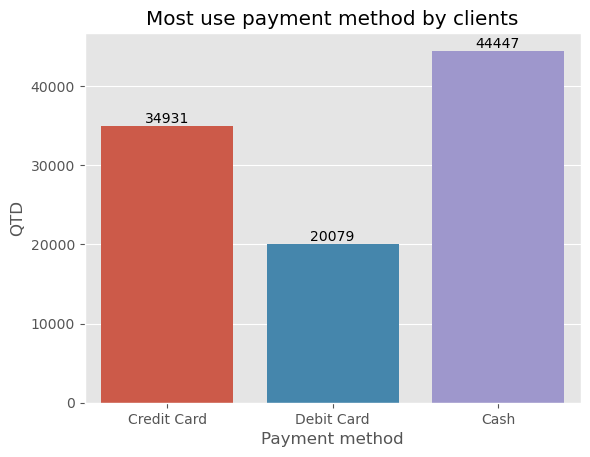

In [15]:
ax = sns.countplot(data=df, x ='payment_method')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Most use payment method by clients')
plt.xlabel("Payment method")
plt.ylabel("QTD")
plt.show()

In [16]:
metodo = df['payment_method'].value_counts().reset_index()
metodo.columns = ['payment_method', 'qtd']
metodo['%'] = (metodo.qtd / metodo.qtd.sum()) * 100
metodo

,payment_method,qtd,%
0,Cash,44447,44.689665
1,Credit Card,34931,35.121711
2,Debit Card,20079,20.188624


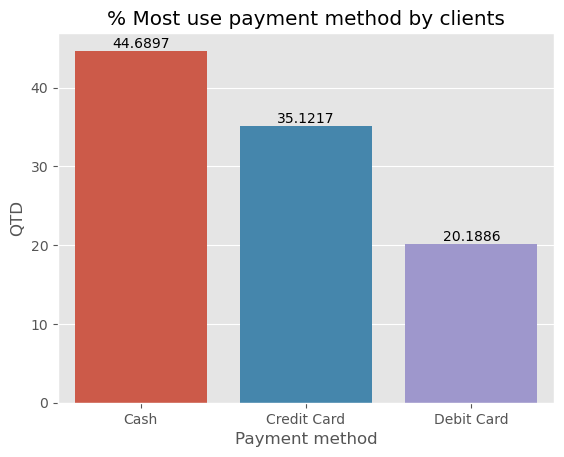

In [17]:
ax = sns.barplot(data=metodo, x ='payment_method' , y='%')
for container in ax.containers:
    ax.bar_label(container)
plt.title('% Most use payment method by clients')
plt.xlabel("Payment method")
plt.ylabel("QTD")
plt.show()

In [18]:
df.shopping_mall.value_counts()

Mall of Istanbul     19943
Kanyon               19823
Metrocity            15011
Metropol AVM         10161
Istinye Park          9781
Zorlu Center          5075
Cevahir AVM           4991
Forum Istanbul        4947
Viaport Outlet        4914
Emaar Square Mall     4811
Name: shopping_mall, dtype: int64

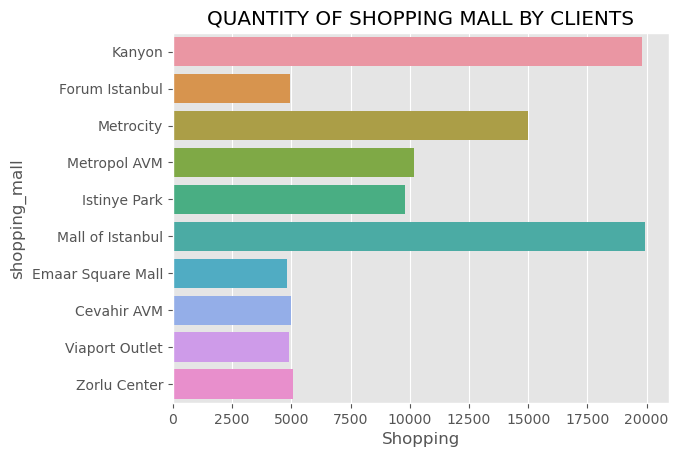

In [19]:
ax = sns.countplot(data=df, y='shopping_mall')
plt.title("QUANTITY OF SHOPPING MALL BY CLIENTS")
plt.xlabel("Shopping")
plt.show()

In [20]:
df['invoice_date']=pd.to_datetime(df.invoice_date)

In [21]:
df['year'] = pd.DatetimeIndex(df['invoice_date']).year
df['month'] = pd.DatetimeIndex(df['invoice_date']).month

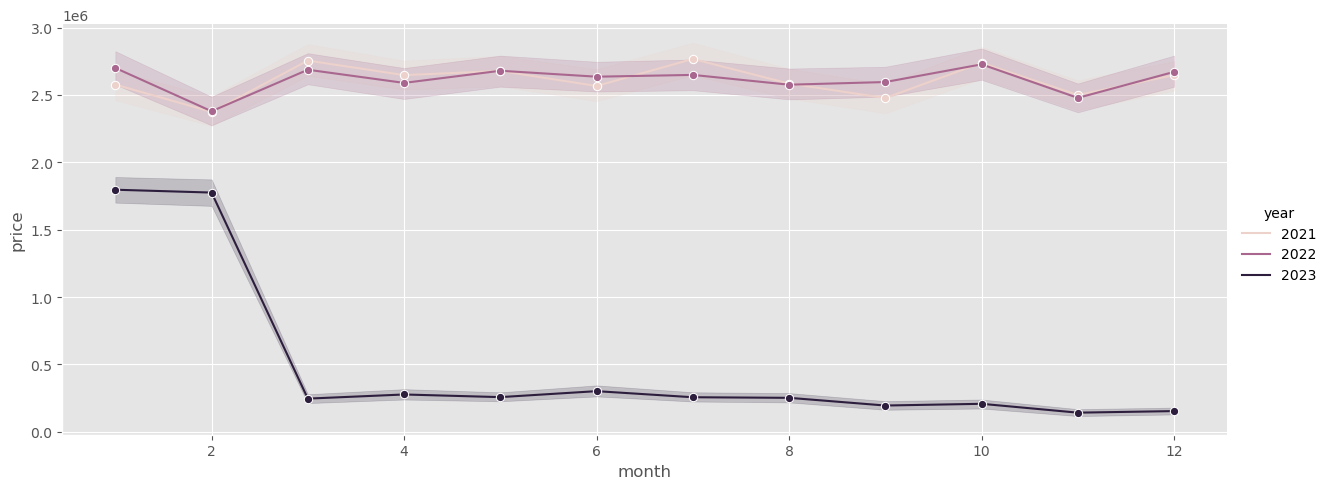

In [22]:
sns.relplot(kind='line', data=df, x='month', y='price', hue='year', aspect=2.5, marker='o', estimator='sum')

We can see in 2023 the value spend in shopping was well less than other years But when we look at 2021 and 2022 are almost the same, with a litte diference

In [23]:
df.groupby('gender')['age'].mean()

gender
Female    43.453515
Male      43.387767
Name: age, dtype: float64

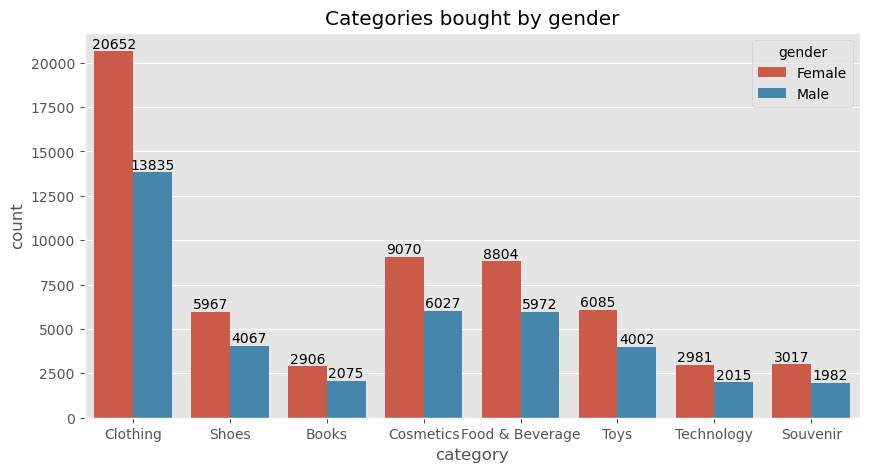

In [24]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='category', hue='gender')
plt.title('Categories bought by gender')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [25]:
new_shop = df.groupby('gender')['shopping_mall'].value_counts().to_frame(name='count').reset_index()
new_shop

,gender,shopping_mall,count
0,Female,Kanyon,11906
1,Female,Mall of Istanbul,11902
2,Female,Metrocity,8941
3,Female,Metropol AVM,6144
4,Female,Istinye Park,5874
5,Female,Forum Istanbul,3016
6,Female,Zorlu Center,2968
7,Female,Viaport Outlet,2949
8,Female,Cevahir AVM,2940
9,Female,Emaar Square Mall,2842


Text(0.5, 1.0, 'Count of clients visit shopping by gender')

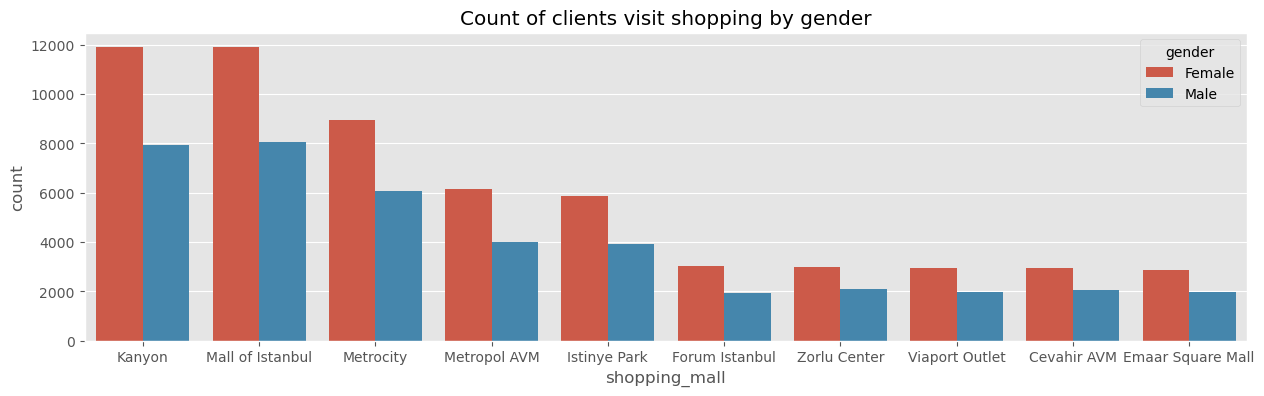

In [26]:
plt.figure(figsize=(15,4))
ax = sns.barplot(data=new_shop, x='shopping_mall', y='count', hue='gender')
plt.title("Count of clients visit shopping by gender")

Text(0.5, 1.0, 'Spend by gender')

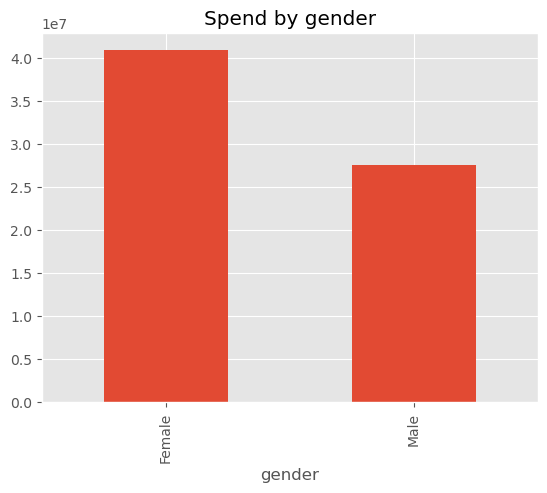

In [27]:
df.groupby('gender')['price'].sum().plot(kind='bar')
plt.title('Spend by gender')

In [28]:
df.groupby('gender')['price'].sum()

gender
Female    40931801.62
Male      27619564.29
Name: price, dtype: float64

THANKS BY CHECK THIS PROJECT!